<a href="https://colab.research.google.com/github/srivastava-jyoti/churn-prediction/blob/main/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as  np


In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
data=pd.read_csv(r'Churn_Modelling.csv')
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.shape

(10000, 14)

In [ ]:
data.isnull().count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [ ]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
 df=data.drop(['RowNumber','Surname','CustomerId'],axis=1)


In [ ]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
df.isna().count()

CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


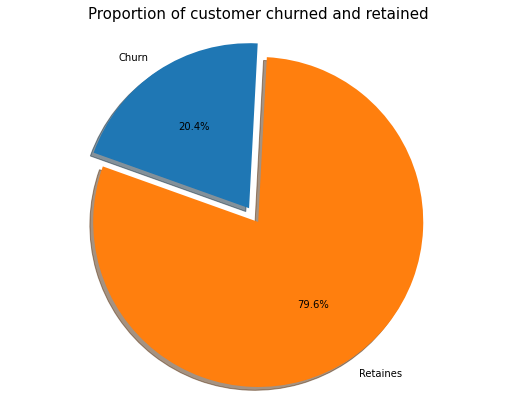

In [ ]:
labels = 'Churn', 'Retaines'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(9, 7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=87)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 15)
plt.show()

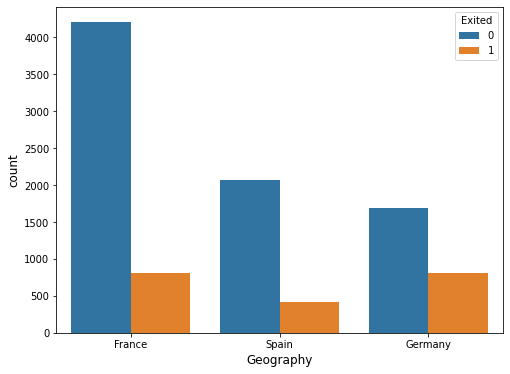

In [ ]:
plt.figure(figsize=(8,6))
plt.xlabel('Geography',fontsize=12)
plt.ylabel('Count',fontsize=12)
sns.countplot(x='Geography',hue='Exited',data=df)
plt.show()

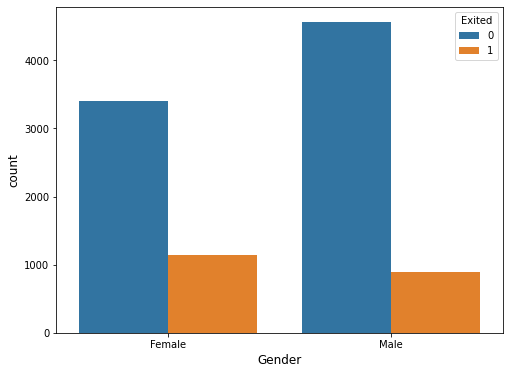

In [ ]:
plt.figure(figsize=(8,6))
plt.xlabel('Gender',fontsize=12)
plt.ylabel('Count',fontsize=12)
sns.countplot(x='Gender',hue='Exited',data=df)
plt.show()

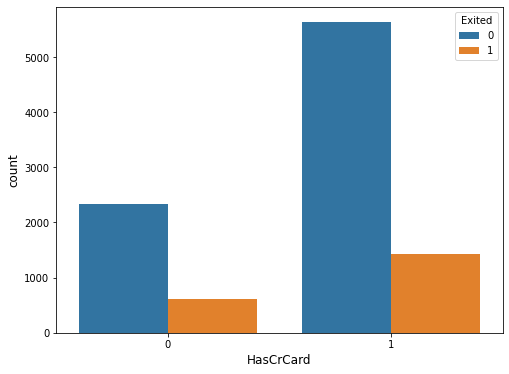

In [ ]:
plt.figure(figsize=(8,6))
plt.xlabel('HasCrCard',fontsize=12)
plt.ylabel('Count',fontsize=12)
sns.countplot(x='HasCrCard',hue='Exited',data=df)
plt.show()

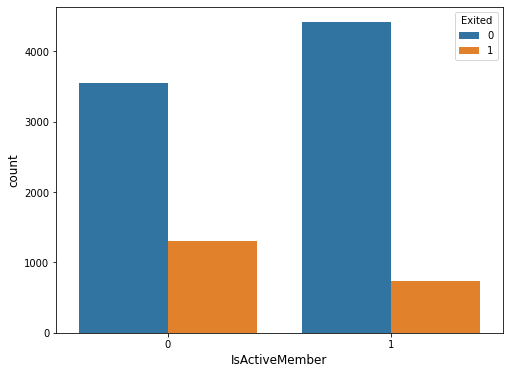

In [ ]:
plt.figure(figsize=(8,6))
plt.xlabel('IsActiveMember',fontsize=12)
plt.ylabel('Count',fontsize=12)
sns.countplot(x='IsActiveMember',hue='Exited',data=df)
plt.show()

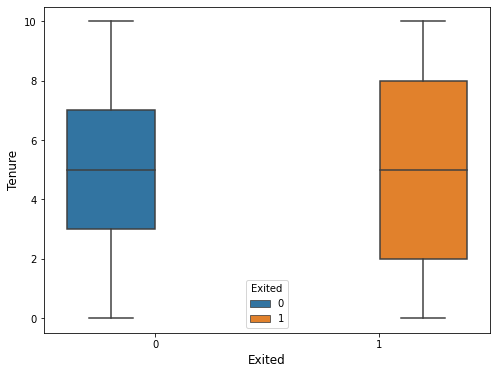

In [ ]:
plt.figure(figsize=(8,6))
plt.xlabel('Tenure',fontsize=12)
plt.ylabel('Exited',fontsize=12)
sns.boxplot(y='Tenure',x='Exited',hue='Exited',data=df)
plt.show()

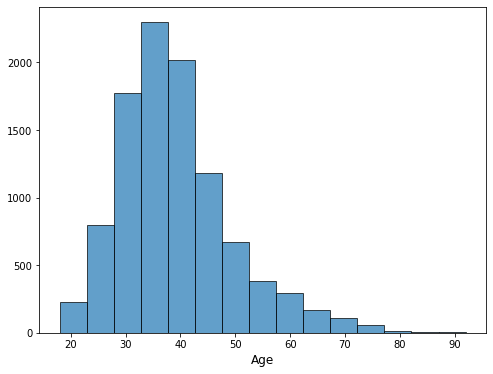

In [ ]:
plt.figure(figsize=(8,6))
plt.xlabel('Age',fontsize=12)
plt.hist(df.Age,bins=15,alpha=0.7,edgecolor='black')
plt.show()

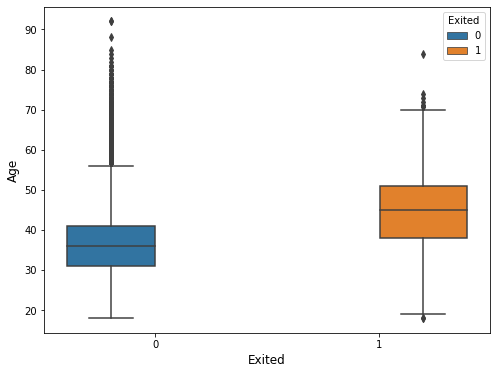

In [ ]:
plt.figure(figsize=(8,6))
plt.xlabel('Exited',fontsize=12)
plt.ylabel('Age',fontsize=12)
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df )
plt.show()

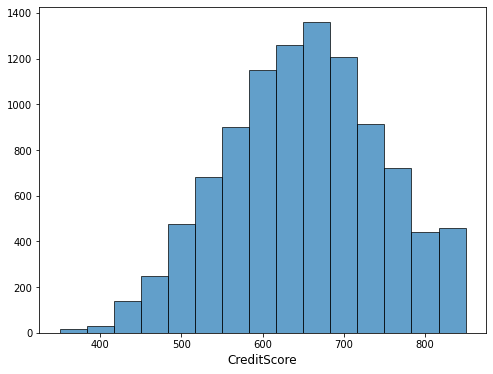

In [ ]:
plt.figure(figsize=(8,6))
plt.xlabel('CreditScore',fontsize=12)
plt.hist(df.CreditScore,bins=15,alpha=0.7,edgecolor='black')
plt.show()

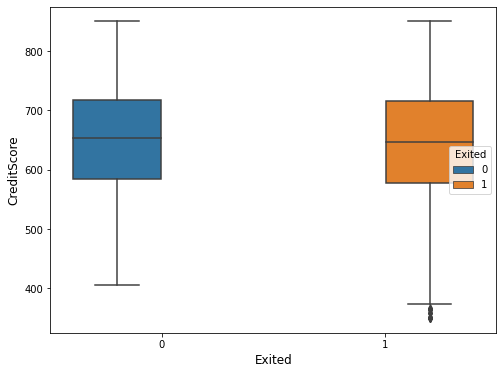

In [ ]:
plt.figure(figsize=(8,6))
plt.xlabel('Exited',fontsize=12)
plt.ylabel('CreditScore',fontsize=12)
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df )
plt.show()

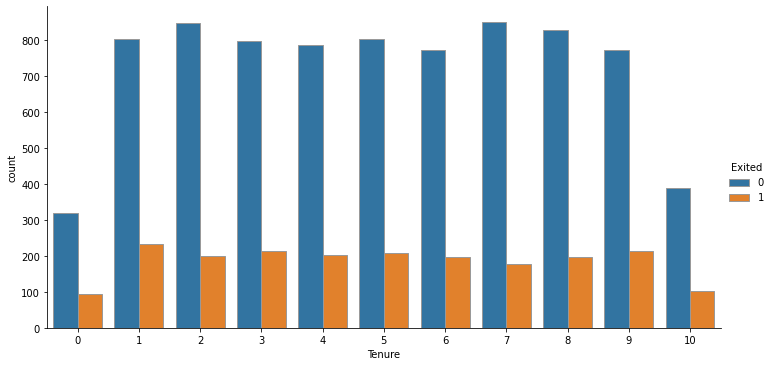

In [ ]:
sns.catplot(x="Tenure", hue="Exited", kind="count",aspect=2, edgecolor=".6",data=df)


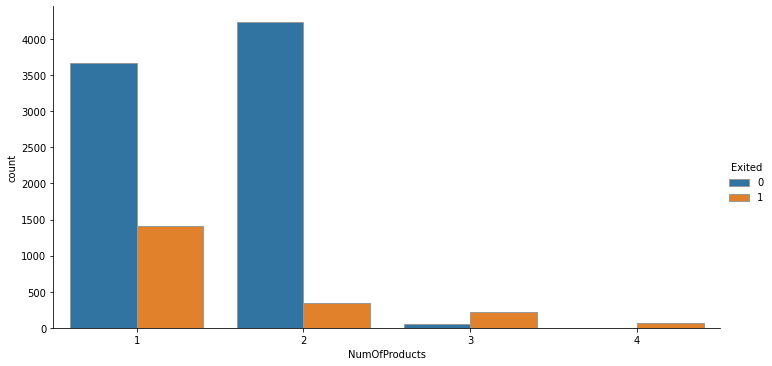

In [ ]:
sns.catplot(x="NumOfProducts", hue="Exited", kind="count", edgecolor=".6",data=df,height=5,aspect=2)

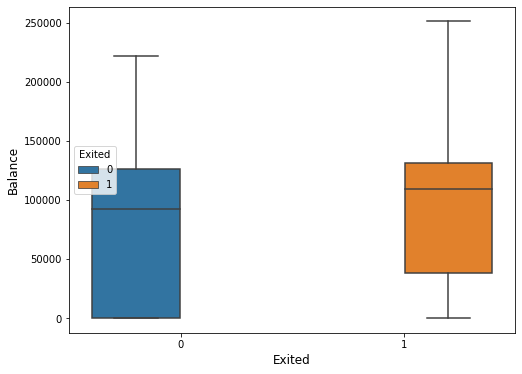

In [ ]:
plt.figure(figsize=(8,6))
plt.xlabel('Balance',fontsize=12)
plt.ylabel('Exited',fontsize=12)
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df )
plt.show()

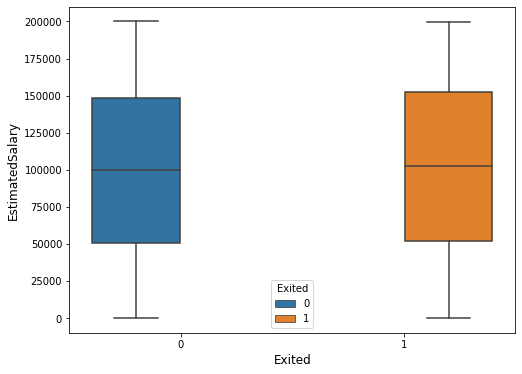

In [ ]:
plt.figure(figsize=(8,6))
plt.xlabel('Exited',fontsize=12)
plt.ylabel('EstimatedSalary',fontsize=12)
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df )
plt.show()

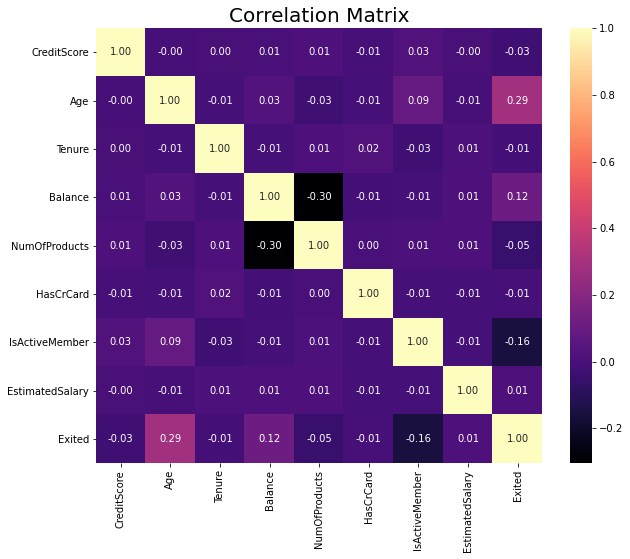

In [ ]:
# Correlation Matrix for Numerical Features
f, ax = plt.subplots(figsize= [10,8])
g = sns.heatmap(df.corr(),annot=True, fmt = ".2f", ax=ax, cmap = "magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df.Gender)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dummy=pd.get_dummies(df['Geography'],drop_first=True)
df=pd.concat([df,dummy],axis=1)
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,619,France,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,France,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,1
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71,1,0,1
6,822,France,1,50,7,0.00,2,1,1,10062.80,0,0,0
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88,1,1,0
8,501,France,1,44,4,142051.07,2,0,1,74940.50,0,0,0
9,684,France,1,27,2,134603.88,1,1,1,71725.73,0,0,0


In [ ]:
df.drop(['Geography'], axis='columns', inplace=True)

In [ ]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


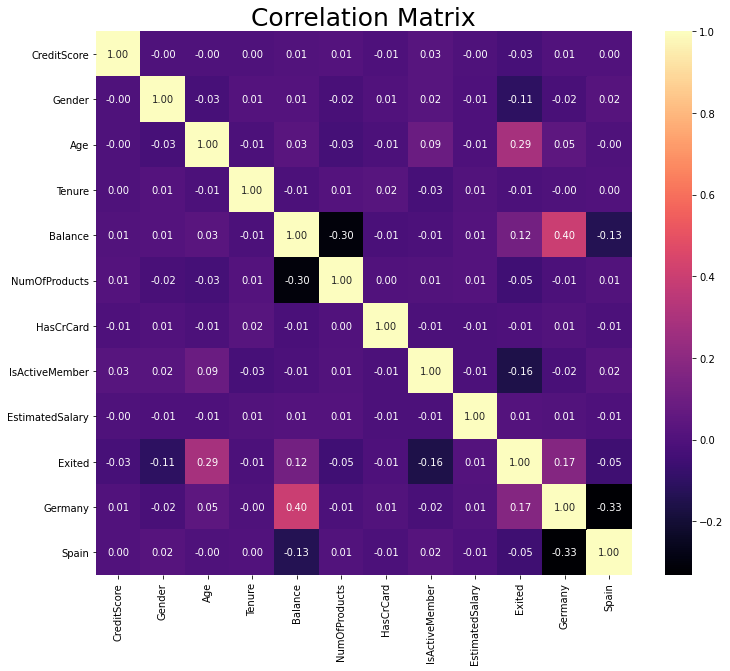

In [ ]:
f, ax = plt.subplots(figsize= [12,10])
g = sns.heatmap(df.corr(),annot=True, fmt = ".2f", ax=ax, cmap = "magma")
ax.set_title("Correlation Matrix", fontsize=25)
plt.show()

In [ ]:
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
continuous_vars

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[continuous_vars] = scaler.fit_transform(df[continuous_vars])
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,1


In [ ]:
X = df.drop('Exited',axis='columns')
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
X_test.shape

(2000, 11)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8125  0.82125 0.81875 0.805   0.81375 0.85125 0.8125  0.82    0.80375
 0.83625]


In [ ]:
# kNN Score
round(np.mean(score)*100, 2)

81.95

In [ ]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.7675  0.795   0.82625 0.7825  0.81    0.815   0.7725  0.795   0.79125
 0.79   ]


In [ ]:
# decision tree Score
round(np.mean(score)*100, 2)

79.45

In [ ]:
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76    0.79875 0.835   0.79375 0.815   0.805   0.78125 0.8     0.78625
 0.79   ]


In [ ]:
# Random Forest Score
round(np.mean(score)*100, 2)

79.65

In [ ]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.815   0.81625 0.8275  0.82    0.83375 0.84625 0.82625 0.83125 0.80625
 0.81625]


In [ ]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

82.39

In [ ]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83375 0.8425  0.84625 0.83    0.84625 0.86375 0.83625 0.84125 0.83
 0.84375]


In [ ]:
round(np.mean(score)*100,2)

84.14

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb= XGBClassifier()
scoring = 'accuracy'
score = cross_val_score(xgb, X_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85875 0.86375 0.8675  0.8525  0.875   0.8825  0.8625  0.86125 0.85
 0.87   ]


In [ ]:
round(np.mean(score)*100,2)

86.44

In [ ]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb.score(X_test,y_test)

0.8595

In [ ]:
y_pred=xgb.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
import pickle

In [ ]:
Pkl_Filename = "model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(xgb, file)

In [ ]:
pip install flask